<a href="https://colab.research.google.com/github/ganeshk79/Bharat_Intern/blob/main/sms_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: SMS SPAM CLASSIFIER
BY GANESH KARIBANDI

This code performs spam detection using a Naive Bayes classifier on a dataset of text messages. Here's a step-by-step explanation:

#Import Libraries:
**pandas**: Used for data manipulation and analysis.
**re**: Regular expression library for text preprocessing.
**nltk**: Natural Language Toolkit for natural language processing tasks.
**CountVectorizer**: Converts a collection of text documents to a matrix of token counts.
MultinomialNB: Implementation of Naive Bayes classifier suitable for classification with discrete features.
Various metrics and tools for evaluating the classifier

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
nltk.download('punkt')

#Read Data:
Read a CSV file containing text messages. The relevant columns are 'v1' (label) and 'v2' (text message content).

In [2]:
text_messages = pd.read_csv('/train_spam.csv', encoding='ISO-8859-1', usecols=['v1', 'v2'])


#Text Preprocessing:
Tokenize, convert to lowercase, remove non-alphabetic characters, remove stopwords, and apply stemming to the text messages.

In [9]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

text_messages['v2'] = text_messages['v2'].apply(preprocess_text)

#Feature Extraction:
Use CountVectorizer to convert the text data into a bag-of-words representation (matrix of token counts).

In [10]:
cv = CountVectorizer(max_features=3000)
X = cv.fit_transform(text_messages['v2']).toarray()

#Prepare Labels:
Convert the categorical labels into binary format.

In [11]:
y = pd.get_dummies(text_messages['v1'])
y = y.iloc[:, 1].values

#Split Data:
Split the data into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


#Train Naive Bayes Model:
Train a Multinomial Naive Bayes classifier using the training data

In [13]:
spam_detection_model = MultinomialNB().fit(X_train, y_train)

#Evaluate Model:
Use various metrics (accuracy, F1 score) to evaluate the performance of the model on the test set.

In [14]:
y_pred = spam_detection_model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9874439461883409
F1 Score: 0.9874439461883409


#Confusion Matrix Visualization:
Display the confusion matrix using ConfusionMatrixDisplay.

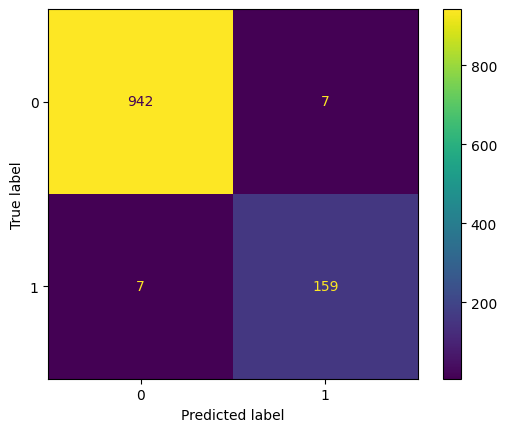

In [15]:
labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

#Make Predictions on New Data:
Preprocess new text messages and use the trained model to make predictions.

In [17]:
new_messages = ['Get a free cruise now!', 'Hey, can you pick up some milk on your way home?']
new_messages = [preprocess_text(msg) for msg in new_messages]
new_messages = cv.transform(new_messages)
predictions1 = spam_detection_model.predict(new_messages)
for i in predictions1:
    if i:
        print("spam message")
    else:
        print("ham message")

spam message
ham message


This script can be used as a basic template for building a spam detection system using a Naive Bayes classifier with text data.

In [24]:
df = pd.read_csv('/test_spam.csv',usecols=['text'])
new_messages = [preprocess_text(msg) for msg in df['text']]
new_messages = cv.transform(new_messages)
predictions = spam_detection_model.predict(new_messages)
df['Spam message']=predictions
df['Spam message']=df['Spam message'].replace(1,True)
df['Spam message']=df['Spam message'].replace(0,False)
display(df.head(10))

,text,Spam message
0,CREDITED: Rs.75 wallet money. Use it to order ...,True
1,"Shoe styles paired with minimal looks, perfect...",True
2,"Kejani Cleaning Services offers comprehensive,...",False
3,Carrefour Fridays month is on!! Crazy deals ev...,False
4,Keep up with MTN Broadband! Visit https://apps...,True
5,Get clientele HELP Cover today. Debi check and...,True
6,Do you like your friend's signature? Reply wit...,True
7,Get 2.5GB + 100 Telkom Mins +2 Bob/ Min to oth...,True
8,Enjoy more talktime when you recharge your Air...,True
9,25% Discount - Get Ultra 50GB from MyTelenor A...,True


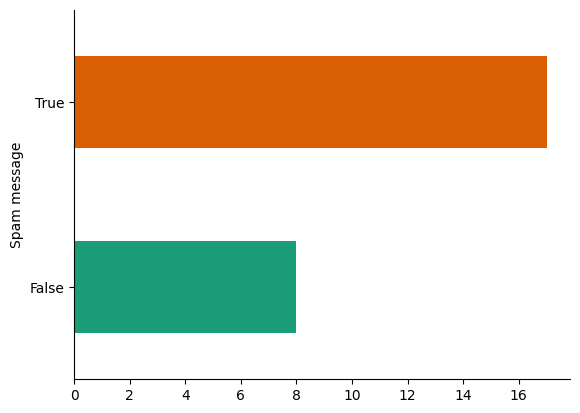

In [25]:
df.groupby('Spam message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)